# Statsmodels Time Series Excercises
For this set of exercises we're using data from the Federal Reserve Economic Database (FRED) concerning the Industrial Production Index for Electricity and Gas Utilities from January 1970 to December 1989.




In [93]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('EnergyProduction.csv',index_col=0,parse_dates=True)
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [94]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

### 1. Assign a frequency of 'MS' to the DatetimeIndex.

In [95]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

### 2. Plot the dataset.

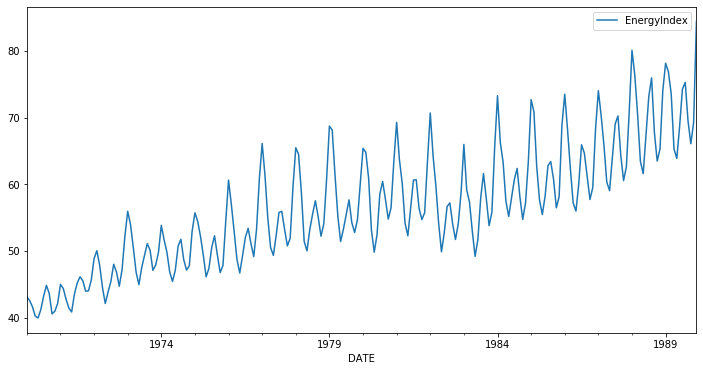

In [97]:
df.plot(figsize=(12,6)).autoscale(axis='x',tight=True);

### 3. Add a column that shows a 12-month Simple Moving Average (SMA).<br>&nbsp;&nbsp;&nbsp;&nbsp;Plot the result.

In [98]:
df['12-month-SMA'] = df['EnergyIndex'].rolling(window=12).mean()

In [99]:
df.head()

,EnergyIndex,12-month-SMA
DATE,,
1970-01-01,43.0869,NaN
1970-02-01,42.5577,NaN
1970-03-01,41.6215,NaN
1970-04-01,40.1982,NaN
1970-05-01,39.9321,NaN


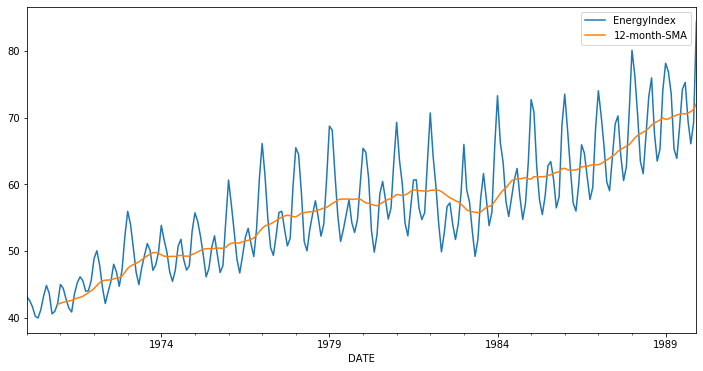

In [101]:
df.plot(figsize=(12,6)).autoscale(axis='x',tight=True);

### 4. Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the statsmodels <tt>SimpleExpSmoothing</tt> function. Plot the result.

In [87]:
# DON'T FORGET TO PERFORM THE IMPORT!
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

df['EWMA12'] = df['EnergyIndex'].ewm(alpha=alpha,adjust=False).mean()
df['SES12']=SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()



,EnergyIndex,trend,12-month-SMA,EWMA12,SES12
DATE,,,,,
1970-01-01,43.0869,41.354065,NaN,43.086900,43.086900
1970-02-01,42.5577,41.471432,NaN,43.005485,43.005485
1970-03-01,41.6215,41.589882,NaN,42.792564,42.792564
1970-04-01,40.1982,41.711177,NaN,42.393431,42.393431
1970-05-01,39.9321,41.837099,NaN,42.014765,42.014765


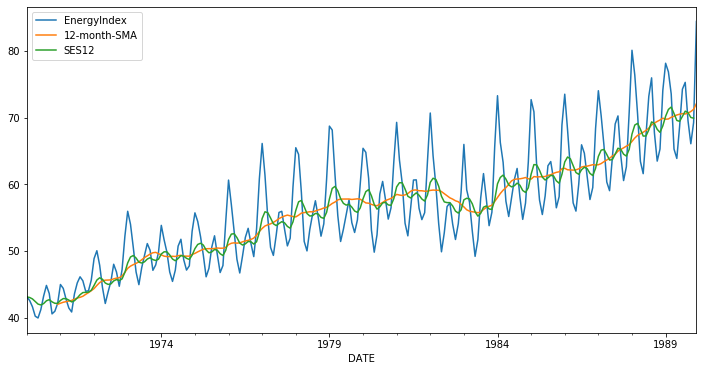

In [88]:
df[['EnergyIndex','12-month-SMA','SES12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

### 5. Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result.

In [90]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df['TESadd12'] = ExponentialSmoothing(df['EnergyIndex'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()
df['TESmul12'] = ExponentialSmoothing(df['EnergyIndex'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\dhruv\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\dhruv\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\dhruv\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,EnergyIndex,trend,12-month-SMA,EWMA12,SES12,TESadd12,TESmul12
DATE,,,,,,,
1970-01-01,43.0869,41.354065,NaN,43.086900,43.086900,43.277590,43.102044
1970-02-01,42.5577,41.471432,NaN,43.005485,43.005485,41.795122,41.068353
1970-03-01,41.6215,41.589882,NaN,42.792564,42.792564,40.062664,39.725047
1970-04-01,40.1982,41.711177,NaN,42.393431,42.393431,38.739278,37.962088
1970-05-01,39.9321,41.837099,NaN,42.014765,42.014765,38.955571,38.599450


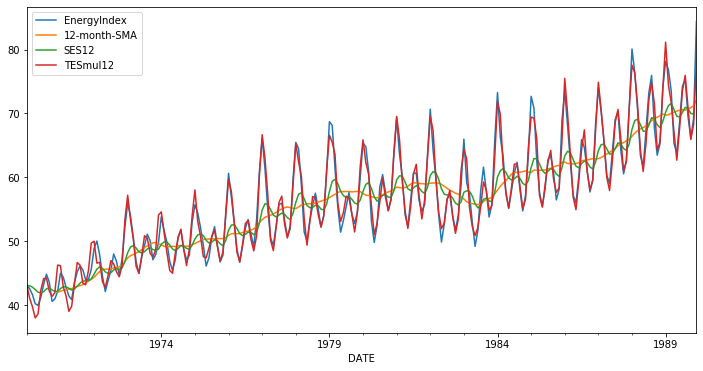

In [91]:
df[['EnergyIndex','12-month-SMA','SES12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);